###### 

you’ll build algorithms to rate the complexity of reading passages for grade 3-12 classroom use. To accomplish this, you'll pair your machine learning skills with a dataset that includes readers from a wide variety of age groups and a large collection of texts taken from various domains

In this competition, we're predicting the reading ease of excerpts from literature. We've provided excerpts from several time periods and a wide range of reading ease scores. Note that the test set includes a slightly larger proportion of modern texts (the type of texts we want to generalize to) than the training set.

# Idea to solve this


Gather, prepare and inspect data
Build simple models to start, and transition to deep learning if necessary
Interpret and understand your models, to make sure you are actually capturing information and not noise

## Step 1: Gather your data
 
 Product reviews (on Amazon, Yelp, and various App Stores)
User-generated content (Tweets, Facebook posts, StackOverflow questions)
Troubleshooting (customer requests, support tickets, chat logs)

## Step 2: Clean your data

1 Remove all irrelevant characters such as any non alphanumeric characters

2 Tokenize your text by separating it into individual words

3 Remove words that are not relevant, such as “@” twitter mentions or urls

4 Convert all characters to lowercase, in order to treat words such as “hello”, “Hello”, and “HELLO” the same

5 Consider combining misspelled or alternately spelled words to a single representation (e.g. “cool”/”kewl”/”cooool”)

6 Consider lemmatization (reduce words such as “am”, “are”, and “is” to a common form such as “be”)



# Step 3: Find a good data representation

Machine Learning models take numerical values as input. Our dataset is a list of sentences, so in order for our algorithm to extract patterns from the data, we first need to find a way to represent it in a way that our algorithm can understand, i.e. as a list of numbers.

## One-hot encoding (Bag of Words):
we can build a vocabulary of all the unique words in our dataset, and associate a unique index to each word in the vocabulary. Each sentence is then represented as a list that is as long as the number of distinct words in our vocabulary.

## Visualizing the embeddings:
n order to see whether our embeddings are capturing information that is relevant to our problem

Step 4: Classification
 
When first approaching a problem, a general best practice is to start with the simplest tool that could solve the job. Whenever it comes to classifying data, a common favorite for its versatility and explainability is Logistic Regression. It is very simple to train and the results are interpretable as you can easily extract the most important coefficients from the model.

We split our data in to a training set used to fit our model and a test set to see how well it generalizes to unseen data. After training, we get an accuracy of 75.4%.

Step 5: Inspection
 
## Confusion Matrix

A first step is to understand the types of errors our model makes, and which kind of errors are least desirable. In our example, false positives are classifying an irrelevant tweet as a disaster, and false negatives are classifying a disaster as an irrelevant tweet. If the priority is to react to every potential event, we would want to lower our false negatives. If we are constrained in resources however, we might prioritize a lower false positive rate to reduce false alarms. A good way to visualize this information is using a Confusion Matrix, which compares the predictions our model makes with the true label.

## Explaining and interpreting our model

To validate our model and interpret its predictions, it is important to look at which words it is using to make decisions. If our data is biased, our classifier will make accurate predictions in the sample data, but the model would not generalize well in the real world. Here we plot the most important words for both the disaster and irrelevant class. Plotting word importance is simple with Bag of Words and Logistic Regression, since we can just extract and rank the coefficients that the model used for its predictions.

Step 6: Accounting for vocabulary structure
 
## TF-IDF
n order to help our model focus more on meaningful words, we can use a TF-IDF score (Term Frequency, Inverse Document Frequency) on top of our Bag of Words model.

 # Step 7: Leveraging semantics
 
## Word2Vec

it is very likely that if we deploy this model, we will encounter words that we have not seen in our training set before. The previous model will not be able to accurately classify these tweets, even if it has seen very similar words during training.

To solve this problem, we need to capture the semantic meaning of words, meaning we need to understand that words like ‘good’ and ‘positive’ are closer than ‘apricot’ and ‘continent.’ The tool we will use to help us capture meaning is called Word2Vec.

## Using pre-trained words

Word2Vec is a technique to find continuous embeddings for words. It learns from reading massive amounts of text and memorizing which words tend to appear in similar contexts.

## Sentence level representation
A quick way to get a sentence embedding for our classifier is to average Word2Vec scores of all words in our sentence. This is a Bag of Words approach just like before, but this time we only lose the syntax of our sentence, while keeping some semantic information.

## The Complexity/Explainability trade-off

it’s harder to see which words are the most relevant to our classification. While we still have access to the coefficients of our Logistic Regression, they relate to the 300 dimensions of our embeddings rather than the indices of words.

For such a low gain in accuracy, losing all explainability seems like a harsh trade-off. However, with more complex models we can leverage black box explainers such as LIME in order to get some insight into how our classifier works.

## LIME

LIME is available on Github through an open-sourced package. A black-box explainer allows users to explain the decisions of any classifier on one particular example by perturbing the input (in our case removing words from the sentence) and seeing how the prediction changes.

Step 8: Leveraging syntax using end-to-end approaches
 
We’ve covered quick and efficient approaches to generate compact sentence embeddings. However, by omitting the order of words, we are discarding all of the syntactic information of our sentences. If these methods do not provide sufficient results, you can utilize more complex model that take in whole sentences as input and predict labels without the need to build an intermediate representation. A common way to do that is to treat a sentence as a sequence of individual word vectors using either Word2Vec or more recent approaches such as GloVe or CoVe.

##  Convolutional Neural Networks 
for Sentence Classification train very quickly and work well as an entry level deep learning architecture. While Convolutional Neural Networks (CNN) are mainly known for their performance on image data, they have been providing excellent results on text related tasks, and are usually much quicker to train than most complex NLP approaches (e.g. LSTMs and Encoder/Decoder architectures). This model preserves the order of words and learns valuable information on which sequences of words are predictive of our target classes. Contrary to previous models, it can tell the difference between “Alex eats plants” and “Plants eat Alex.”

In [43]:
# import libraries
import pandas as pd
import string
import numpy as np
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
from numpy import array
from numpy import argmax
from collections import defaultdict
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder,Binarizer
from sklearn.preprocessing import OneHotEncoder
import gensim
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
import matplotlib
import matplotlib.pyplot as plt
#Enable matplotlib to be interactive (zoom etc)
%matplotlib inline

In [2]:

path_data="C:/Users/hello/Downloads/commonlitreadabilityprize/"
trainfile="train.csv"
testfile="test.csv"
submissionfile="sample_submission.csv"

In [3]:
#Step 1: Gather your data
def getdata(path_data,filename):
    return(pd.read_csv(path_data+filename))

In [4]:
train_data=getdata(path_data,trainfile)
train_data.head()

,id,url_legal,license,excerpt,target,standard_error
0,c12129c31,NaN,NaN,When the young people returned to the ballroom...,-0.340259,0.464009
1,85aa80a4c,NaN,NaN,"All through dinner time, Mrs. Fayre was somewh...",-0.315372,0.480805
2,b69ac6792,NaN,NaN,"As Roger had predicted, the snow departed as q...",-0.580118,0.476676
3,dd1000b26,NaN,NaN,And outside before the palace a great garden w...,-1.054013,0.450007
4,37c1b32fb,NaN,NaN,Once upon a time there were Three Bears who li...,0.247197,0.510845


In [5]:
train_data.shape

(2834, 6)

In [6]:
corpus='\n'.join(train_data[:2834]['excerpt'])
sentences=corpus.split('\n')
sentences=[line.lower().split(' ') for line in sentences]

In [7]:
def clean_line(sente):
    return [l.strip(',."?!:;()\'') for l in sente]
sentences=[clean_line(s) for s in sentences if (len(s)>0)]

# Training the model

Once we have the sentences,we are using Gensim to create a model

In [8]:
model_vec=Word2Vec(sentences,  window=6, min_count=1, workers=5,epochs=100)


In [9]:
word_vectors=model_vec.wv
#persist word vectors to disk
word_vectors.save('vectors.kv')


In [10]:

print(word_vectors['good'])

[ 1.8098593  -2.778814    1.628189   -2.3508477  -0.14926034 -1.4987595
  0.2803418  -2.5502865   0.23759677  3.9040911  -1.6048673  -2.0354729
 -4.0224953   2.0635056   0.7603519  -0.26699445 -1.3000987  -2.2515593
  4.748324   -1.6356965  -3.2070851  -1.4997448  -0.99284655  2.8614626
 -0.19216232 -4.780669    4.943157    0.7268505   3.9665005  -1.3968074
  1.875919    2.1296287  -2.3227336   3.7262414   3.0345137  -1.8780355
 -1.1461672   2.4561493  -3.3199813  -0.18570729  0.9665396   1.7801231
  0.20085926 -2.356984    4.8135223   1.0159655   1.3660649   0.11759757
 -3.596689   -0.5108405  -0.17417578 -0.4486835  -1.991314   -0.2094858
  1.3202808  -3.5709217  -0.5666302   0.52732414  0.73356175 -1.4703343
  0.4242387   2.0625427  -0.89579445 -0.1369947  -0.63765734 -2.227702
 -0.5005843  -1.7324942  -1.5907896  -0.15549459  0.51828843 -2.133739
 -1.509142    0.01217758 -1.9129469  -2.6469557   1.185796   -3.681792
 -4.1808014   0.8369276   2.2295022   0.36762753 -0.64201856 -3.89

In [11]:
#Step 2: Clean your data
def cleandata(textdata):
    # split into words by white space
    #f = lambda x: (str(x["excerpt"]).split(" "))
    f=lambda x:(word_tokenize(str(x["excerpt"])))
    textdata["excerpt"] = textdata.apply(f, axis=1)
    
    # convert to lower case
    lowercase = lambda x: (str(x["excerpt"]).lower())
    textdata["excerpt"]= textdata.apply(lowercase, axis=1)
    # remove punctuation from each word
   
    table = str.maketrans(dict.fromkeys(string.punctuation))
    stripped =lambda x: ( str(x["excerpt"]).translate(table) )
    textdata["excerpt"] = textdata.apply(stripped,axis=1)
    
    # remove remaining tokens that are not alphabetic
    def words(t):
        y=re.sub('[^A-Za-z]',' ',str(t))
        return y
    textdata["excerpt"]= textdata['excerpt'].apply(words)
    # filter out stop words
    stop_words = stopwords.words('english')
    textdata['excerpt']=textdata['excerpt'].apply(lambda x: ' '.join([item for item in x.split() if item not in (stop_words)]))
    porter = PorterStemmer()
    #stemmed = [porter.stem(word) for word in tokens]
    stem=lambda x: (' '.join([porter.stem(y) for y in x.split()]))
    textdata['excerpt'] = textdata['excerpt'].apply(stem) # Stem every word.
    
    return textdata
    

In [12]:
df=cleandata(train_data)
df.head()

,id,url_legal,license,excerpt,target,standard_error
0,c12129c31,NaN,NaN,young peopl return ballroom present decidedli ...,-0.340259,0.464009
1,85aa80a4c,NaN,NaN,dinner time mr fayr somewhat silent eye rest d...,-0.315372,0.480805
2,b69ac6792,NaN,NaN,roger predict snow depart quickli came two day...,-0.580118,0.476676
3,dd1000b26,NaN,NaN,outsid palac great garden wall round fill full...,-1.054013,0.450007
4,37c1b32fb,NaN,NaN,upon time three bear live togeth hous wood one...,0.247197,0.510845


In [13]:
# Step 3: Find a good data representation(One-hot encoding (Bag of Words))

In [14]:
def one_hot_en(data):
    labelencoder=LabelEncoder()
    data['excerpt_cat']=labelencoder.fit_transform(data['excerpt'])
    enc=OneHotEncoder(handle_unknown='ignore')
    enc_df=pd.DataFrame(enc.fit_transform(data[['excerpt_cat']]).toarray())
    data=data.join(enc_df)
    return data

In [15]:
df_en=one_hot_en(df)
df_en.head()

,id,url_legal,license,excerpt,target,standard_error,excerpt_cat,0,1,2,...,2823,2824,2825,2826,2827,2828,2829,2830,2831,2832
0,c12129c31,NaN,NaN,young peopl return ballroom present decidedli ...,-0.340259,0.464009,2824,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,85aa80a4c,NaN,NaN,dinner time mr fayr somewhat silent eye rest d...,-0.315372,0.480805,547,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,b69ac6792,NaN,NaN,roger predict snow depart quickli came two day...,-0.580118,0.476676,2142,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,dd1000b26,NaN,NaN,outsid palac great garden wall round fill full...,-1.054013,0.450007,1885,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,37c1b32fb,NaN,NaN,upon time three bear live togeth hous wood one...,0.247197,0.510845,2636,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
df_en.shape

(2834, 2840)

# Train a Word2Vec model
model = Word2Vec(tokenised, min_count=1)
# summarize the loaded model
print(model)

# summarise vocabulary
words = list(model.wv.vocab)
print(words[0:5])

# access vector for one word for reference
print(model['Sorry'])

## count frquency of words

In [17]:

word_freq = defaultdict(int)
def count_freq(df):
    for text in df['excerpt']:
        for word in text.split():
            word_freq[word] += 1
    return pd.DataFrame({'word': list(word_freq.keys()),'abs_freq':list(word_freq.values())})
     
    

In [18]:
df_freq=count_freq(df_en)

In [19]:
df_freq.shape


(18537, 2)

In [20]:
df_freq.tail(25)

,word,abs_freq
18512,pupa,1
18513,antlov,1
18514,mothbal,3
18515,downsid,1
18516,esophagu,2
18517,peristalsi,1
18518,gastric,2
18519,pylor,1
18520,sclera,2
18521,retina,1


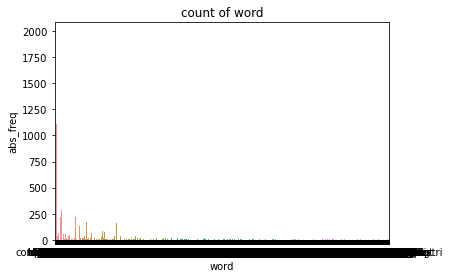

In [53]:
#color_list = ['r', 'b', 'g', 'y']
#colors = [color_list[i] for i in df['category']]
import seaborn as sns
sns.barplot(x='word',y='abs_freq',data=df_freq)
plt.title('count of word')
#fig=plt.gcf()
fig.set_size_inches(10,5)
plt.show()

# Term Frequency — Inverse Document Frequency (TF-IDF)

In [21]:

from sklearn.feature_extraction.text import TfidfVectorizer
# define the documents
tf_data=train_data
# implement tfidf
tfidf = TfidfVectorizer()
x = tfidf.fit_transform(tf_data['excerpt'])
df1 = pd.DataFrame(x.toarray(), columns=tfidf.get_feature_names())


In [26]:
df1


,aa,aaauuuu,aah,aai,aaminah,aaron,aback,abagnal,abandon,abat,abbey,abbot,abbrevi,abc,abdomen,abe,abeb,abel,aberdonian,aberr,abhor,abhorr,abid,abigail,abik,abil,abiogen,abiot,abject,abl,ablat,ablaz,abli,ablut,abnorm,aboard,abod,abolish,abolit,abort,abound,aboveground,abovement,abrad,abraham,abreast,abroad,abrupt,abruptli,absenc,absent,absente,absolut,absorb,absorpt,abstain,abstent,abstract,absurd,absurdli,abu,abuja,abula,abund,abundantli,abus,abut,abydo,abyss,ac,acacia,academ,academi,academia,academician,acadian,acceler,acceleromet,accent,accept,access,accessori,accid,accident,accommod,accompani,accomplic,accomplish,accord,accordingli,accordion,accost,account,accoutr,accredit,accumul,accur,accuraci,accus,accustom,acet,acetylen,ach,achaemenid,achaian,achiev,acid,acknowledg,acm,acock,acorncup,acoust,acquaint,acquiesc,acquir,acquisit,acr,acrid,acrobat,acronym,across,act,action,activ,activist,acton,actor,actress,actual,actuat,acuiti,acuminata,acut,ad,adag,adam,adapt,add,addict,addit,address,adela,adelaid,adelbert,adena,adenin,adequ,adhd,adher,adhes,adieu,adjac,adject,adjoin,adjud,adjust,administ,administr,admir,admiralti,admiringli,admiss,admit,admitt,admixtur,admonit,adob,adolay,adolesc,adolescentsyoung,adolf,adolph,adopt,ador,adorn,adrenalin,adrian,adriana,adrianopl,adriat,adul,adult,adulthood,advanc,advantag,advent,adventur,advers,adversari,advertis,advic,adviceboat,advis,advisor,advisori,advoc,adytum,aegean,aegeu,aerial,aerodynam,aerogener,aeronaut,aeroplan,aerosol,aerost,aershimana,aethra,afar,afeefah,affair,affect,affection,affin,affirm,affix,afflict,afford,affright,aflam,afloat,afoot,aforesaid,afraid,africa,african,africanamerican,aft,afterdinn,afterlif,aftermath,afternoon,afterthought,afterward,agamemnon,agaragar,agatha,agav,age,agenc,agent,ageold,agglomer,aggrav,aggreg,aggress,aggressor,aghast,agil,agin,...,woof,wool,woolbear,woolen,wooler,wooli,woolli,woolworth,worcest,word,wordform,wordi,wordless,wordpad,wore,work,workday,worker,workerbe,workforc,workingbe,workingclass,workingman,workingpeopl,workman,workmanship,workmen,workpeopl,workshop,workspac,workstat,worktabl,world,worldclass,worldli,worldlight,worldwid,worm,worn,wornout,worpl,worri,worrisom,wors,worsen,worship,worst,worth,worthi,worthier,worthili,worthless,worthwhil,wotton,would,wouldb,wound,wouter,wove,woven,wow,woz,wpu,wrap,wrappedup,wrapt,wrass,wrath,wrathi,wratten,wreak,wreath,wreck,wreckag,wren,wrench,wrest,wretch,wretched,wri,wriggl,wright,wring,wrinkl,wrist,wristband,wristwatch,write,writer,writh,writingdesk,writingt,written,wrong,wrongdo,wrote,wrought,wroughtiron,wrung,wrykinian,wtg,wucki,wug,wuhan,wurtemberg,wuwi,wuz,wuzzi,wvm,wwi,wwii,www,wwwwikipediaorg,wyandott,wyom,xci,xenophon,xinhai,xiv,xlink,xray,xvi,yabbit,yacht,yaga,yah,yak,yakovlev,yale,yalta,yana,yangu,yank,yanke,yankton,yanni,yard,yardli,yarmouth,yarn,yatsen,yawn,ye,yeah,year,yearl,yearli,yearn,yearold,yearround,yearsold,yeast,yebo,yeddo,yelk,yell,yellow,yellowback,yellowish,yellowstrip,yellowwing,yelp,yemen,yeoman,yeomen,yesterday,yet,yew,yield,yihdego,yin,yniol,yoh,yoke,yonah,yonder,yore,york,yorker,yorkshir,yorktown,young,younger,youngest,youngster,yoursyou,youth,youtub,youyou,yuadoo,yuck,yummi,yusuf,zachari,zachariah,zag,zakariya,zambezi,zara,zard,zeal,zealot,zebrafish,zee,zege,zeit,zenith,zeppelin,zero,zest,zethu,zettabyt,zeu,zhilin,zhou,zibethieu,zig,ziggurat,zigzag,zilpah,zimbabw,zimmerman,zimmermann,zinc,zip,zipanga,zo,zoan,zodiac,zodwa,zola,zone,zonk,zoo,zoolog,zoologist,zoom,zoomzoom,zooplankton,zoospor,zoouhzanthele,zooxanthella,zossima,zsound,zukunft,zulu,zummmm,zummmmmm,zymolog,zzzzz
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [23]:
#pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 1500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
df1.dtypes

aa          float64
aaauuuu     float64
aah         float64
aai         float64
aaminah     float64
             ...   
zulu        float64
zummmm      float64
zummmmmm    float64
zymolog     float64
zzzzz       float64
Length: 18518, dtype: object

In [24]:
cos_sim=x @ x.T

In [27]:
cos_sim.todense()

matrix([[1.        , 0.00891602, 0.03490909, ..., 0.01635722, 0.01035236,
         0.00298089],
        [0.00891602, 1.        , 0.04047928, ..., 0.01586426, 0.00777235,
         0.        ],
        [0.03490909, 0.04047928, 1.        , ..., 0.0083007 , 0.00880591,
         0.00935982],
        ...,
        [0.01635722, 0.01586426, 0.0083007 , ..., 1.        , 0.16984141,
         0.00478338],
        [0.01035236, 0.00777235, 0.00880591, ..., 0.16984141, 1.        ,
         0.00494564],
        [0.00298089, 0.        , 0.00935982, ..., 0.00478338, 0.00494564,
         1.        ]])

In [29]:
import nltk
STEMMER = nltk.stem.porter.PorterStemmer()
tf_data=train_data
def stem_tokens(tokens, stemmer=STEMMER):
    return [stemmer.stem(item) for item in tokens]
    
    
def tokenizer(text):
    tokens = nltk.word_tokenize(text)
    return stem_tokens(tokens)
    
    
tfidf = TfidfVectorizer(tokenizer=tokenizer, stop_words='english')

# assuming our text elements exist in a pandas dataframe `df` with
# a column / feature name of `document`
tfs = tfidf.fit_transform(tf_data['excerpt'])

# you can calculate cosine similarity easily given this
cossim = tfs @ tfs.T

C:\Users\hello\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'formerli', 'forti', 'ha', 'henc', 'hereaft', 'herebi', 'hi', 'howev', 'hundr', 'inde', 'latterli', 'mani', 'meanwhil', 'moreov', 'mostli', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'seriou', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'thi', 'thu', 'togeth', 'twelv', 'twenti', 'veri', 'wa', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  warni

In [31]:
df11 = pd.DataFrame(tfs.toarray(), columns=tfidf.get_feature_names())
df11.head(25)

,aa,aaauuuu,aah,aai,aaminah,aaron,aback,abagn,abandon,abat,abbey,abbot,abbrevi,abc,abdomen,abe,abeb,abel,aberdonian,aberr,abhor,abhorr,abid,abigail,abik,abil,abiogen,abiot,abject,abl,ablat,ablaz,abli,ablut,abnorm,aboard,abod,abolish,abolit,abort,abound,abov,aboveground,abrad,abraham,abreast,abroad,abrupt,abruptli,absenc,absent,absolut,absorb,absorpt,abstain,abstent,abstract,absurd,absurdli,abu,abuja,abula,abund,abundantli,abut,abydo,abyss,ac,acacia,academ,academi,academia,academician,acadian,accel,acceleromet,accent,accept,access,accessori,accid,accommod,accompani,accompl,accomplish,accord,accordingli,accordion,accost,account,accoutr,accredit,accu,accumul,accur,accuraci,accustom,acet,acetylen,ach,achaemenid,achaian,achiev,acid,acknowledg,acm,acock,acorncup,acoust,acquaint,acquiesc,acquir,acquisit,acr,acrid,acrobat,acronym,act,action,activ,activist,acton,actor,actress,actual,actuat,acuiti,acuminata,acut,ad,adag,adam,adapt,add,addict,addit,address,adela,adelaid,adelbert,adena,adenin,adequ,adh,adhd,adher,adieu,adjac,adject,adjoin,adjud,adjust,administ,administr,admir,admiralti,admiringli,admiss,admit,admitt,admixtur,admonit,adob,adolay,adolesc,adolescentsyoung,adolf,adolph,adopt,ador,adorn,adrenalin,adrian,adriana,adrianopl,adriat,adul,adult,adulthood,advanc,advantag,advent,adventur,adver,adversari,adverti,advi,advic,adviceboat,advisor,advisori,advoc,adytum,aegean,aegeu,aerial,aerodynam,aerogen,aeronaut,aeroplan,aerosol,aerost,aershimana,aethra,afar,afeefah,affair,affect,affin,affirm,affix,afflict,afford,affright,aflam,afloat,afoot,aforesaid,afraid,africa,african,africanamerican,aft,afterdinn,afterlif,aftermath,afternoon,afterthought,afterward,agamemnon,agaragar,agatha,agav,age,agenc,agent,ageold,agglom,aggrav,aggreg,aggress,aggressor,aghast,agil,agin,agit,ago,agoni,agor,agora,...,woodsman,woodsmen,woodwork,woof,wool,woolbear,woolen,wooler,wooli,woolli,woolworth,wor,worcest,word,wordform,wordi,wordless,wordpad,wore,work,workday,worker,workerb,workforc,workingb,workingclass,workingman,workingpeopl,workman,workmanship,workmen,workpeopl,workshop,workspac,workstat,worktabl,world,worldclass,worldli,worldlight,worldwid,worm,worn,wornout,worpl,worri,worrisom,worsen,worship,worst,worth,worthi,worthier,worthili,worthless,worthwhil,wotton,wouldb,wound,wouter,wove,woven,wow,woz,wpu,wrap,wrappedup,wrapt,wrass,wrath,wrathi,wratten,wreak,wreath,wreck,wreckag,wren,wrench,wrest,wretch,wri,wriggl,wright,wring,wrinkl,wrist,wristband,wristwatch,write,writer,writh,writingdesk,writingt,written,wrong,wrongdo,wrote,wrought,wroughtiron,wrung,wrykinian,wtg,wucki,wug,wuhan,wurtemberg,wuwi,wuz,wuzzi,wvm,wwi,wwii,www,wwwwikipediaorg,wyandott,wyom,x,xci,xenophon,xinhai,xiv,xlink,xray,xvi,yabbit,yacht,yaga,yah,yak,yakovlev,yale,yalta,yana,yangu,yank,yankton,yanni,yard,yardli,yarmouth,yarn,yatsen,yawn,ye,yeah,year,yearl,yearli,yearn,yearold,yearround,yearsold,yeast,yebo,yeddo,yelk,yell,yellow,yellowback,yellowish,yellowstrip,yelp,yemen,yeoman,yeomen,yesterday,yew,yield,yihdego,yin,yniol,yoh,yoke,yonah,yonder,yore,york,yorker,yorkshir,yorktown,young,younger,youngest,youngster,yoursyou,youth,youtub,youyou,yuadoo,yuck,yummi,yusuf,z,zachari,zachariah,zag,zakariya,zambezi,zara,zard,zeal,zealot,zebrafish,zee,zege,zeit,zenith,zeppelin,zero,zest,zethu,zettabyt,zeu,zhilin,zhou,zibethieu,zig,ziggurat,zigzag,zilpah,zimbabw,zimmerman,zimmermann,zinc,zip,zipanga,zo,zoan,zodiac,zodwa,zola,zone,zonk,zoo,zoolog,zoologist,zoom,zoomzoom,zooplankton,zoospor,zoouhzanthel,zooxanthella,zossima,zsound,zukunft,zulu,zummmm,zummmmmm,zymolog,zzzzz
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0

In [38]:
# KMeans clustering is a method of clustering.
from sklearn.cluster import KMeans

number_of_clusters = 3
km = KMeans(n_clusters=number_of_clusters)
km.fit(tfs)

KMeans(n_clusters=3)

In [39]:
print("Top terms per cluster:")
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
terms = tfidf.get_feature_names()
for i in range(number_of_clusters):
    top_ten_words = [terms[ind] for ind in order_centroids[i, :5]]
    print("Cluster {}: {}".format(i, ' '.join(top_ten_words)))

Top terms per cluster:
Cluster 0: peopl war state year countri
Cluster 1: use brain cell water differ
Cluster 2: littl said look went came


In [40]:
km.labels_

array([2, 2, 2, ..., 1, 1, 1])

In [41]:
results = pd.DataFrame()
results['text'] = tf_data['excerpt']
results['category'] = km.labels_
results

,text,category
0,young peopl return ballroom present decidedli ...,2
1,dinner time mr fayr somewhat silent eye rest d...,2
2,roger predict snow depart quickli came two day...,2
3,outsid palac great garden wall round fill full...,2
4,upon time three bear live togeth hous wood one...,2
...,...,...
2829,think dinosaur live pictur see hot steami swam...,0
2830,solid solid usual hard molecul pack togeth clo...,1
2831,second state matter discuss liquid solid hard ...,1
2832,solid shape actual touch three dimens mean len...,1
